## House Prices

In this case study, we will use one Kaggle’s House Prices: Advanced Regression Techniques dataset to learn combine datasets, clean, do some exploratory data analysis (EDA) and prepare the dataset for Machine Learning Modeling. There will be 2 datasets from Kaggle; train and test datasets. In this study we will utilize both of the datasets.
The reason why they have train and test is because, Machine Learning requires both. But in our case, we will only do data cleaning and EDA. To start with, we will need to download the datasets and combine them using Python’s package; pandas.  

Datasets can be found at: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

You are a data scientist helping understand the data. By doing this challenge, you will learn how to combine datasets (there are different ways to do it, and we will learn how to decide which one works for us), data cleaning ( data preparation) and EDA.  

Your analysis must be able to address the following requests:
1. Load and Combine two datasets
2. Identify the missing values and replace them if necessary, and drop them
3. Cleaning the data. In this case, for some columns you can fill missing data.
4. Find out the minimum, maximum and average Lot Area.
5. Plot the correlation between the columns
6. Plot the distribution of LotArea, and do the same after normalizing the LotArea
7. Pair plot the following columns : 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8

In [2]:
test = pd.read_csv('/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/Kaggle Competition - House Prices/test.csv')
test.head().transpose()

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [3]:
train = pd.read_csv('/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/Kaggle Competition - House Prices/train.csv')
train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

---

## 1. Combining the Dataset

In [6]:
data = test.append(train, ignore_index=True)

In [7]:
data.shape

(2919, 81)

---

## 2. and 3. Data Cleaning

In [8]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [10]:
data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

In [11]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [12]:
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1, inplace=True)

In [14]:
data.SalePrice = data.SalePrice.fillna(value=data.SalePrice.mean())

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      29

In [18]:
data.dropna(inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 0 to 2918
Data columns (total 75 columns):
1stFlrSF         2657 non-null int64
2ndFlrSF         2657 non-null int64
3SsnPorch        2657 non-null int64
BedroomAbvGr     2657 non-null int64
BldgType         2657 non-null object
BsmtCond         2657 non-null object
BsmtExposure     2657 non-null object
BsmtFinSF1       2657 non-null float64
BsmtFinSF2       2657 non-null float64
BsmtFinType1     2657 non-null object
BsmtFinType2     2657 non-null object
BsmtFullBath     2657 non-null float64
BsmtHalfBath     2657 non-null float64
BsmtQual         2657 non-null object
BsmtUnfSF        2657 non-null float64
CentralAir       2657 non-null object
Condition1       2657 non-null object
Condition2       2657 non-null object
Electrical       2657 non-null object
EnclosedPorch    2657 non-null int64
ExterCond        2657 non-null object
ExterQual        2657 non-null object
Exterior1st      2657 non-null object
Exterior2nd      26

In [21]:
data.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
                ..
LotArea          0
LotConfig        0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SalePrice        0
SaleType         0
ScreenPorch 

We successfully dropped all null values

---

## 4.

In [23]:
print('Min Lot Area: ', data.LotArea.min())

Min Lot Area:  1300


In [25]:
print('Max Lot Area: ', data.LotArea.max())

Max Lot Area:  215245


In [28]:
print('Avg Lot Area: ', round(data.LotArea.mean()))

Avg Lot Area:  10238


---

## 5.

In [40]:
c = data.corr()

In [41]:
c

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,LogOfArea,LogofSalePrice
1stFlrSF,1.000000,-0.261040,0.044262,0.077426,0.472191,0.080931,0.265670,0.012823,0.304693,-0.060751,...,0.424012,0.095556,0.381129,0.888435,0.227900,0.304776,0.245023,-0.012916,0.435186,0.418152
2ndFlrSF,-0.261040,1.000000,-0.036121,0.512196,-0.175934,-0.104871,-0.176648,-0.057839,-0.018117,0.049988,...,0.226424,0.011636,0.589535,-0.261236,0.081531,0.023311,0.149143,-0.032612,0.038703,0.220146
3SsnPorch,0.044262,-0.036121,1.000000,-0.054223,0.053457,-0.024635,0.029759,0.028798,-0.007959,-0.031607,...,0.036539,-0.031069,-0.029433,0.040827,-0.007283,0.016304,0.031372,0.027420,0.033324,0.041077
BedroomAbvGr,0.077426,0.512196,-0.054223,1.000000,-0.125562,-0.028075,-0.175744,0.020362,0.173552,0.051039,...,0.119356,0.017312,0.655323,0.032497,0.040750,-0.060211,-0.048530,-0.040150,0.267997,0.138611
BsmtFinSF1,0.472191,-0.175934,0.053457,-0.125562,1.000000,-0.073997,0.627525,0.065260,-0.530198,-0.101683,...,0.255368,0.095225,0.061982,0.522611,0.206657,0.258361,0.129749,0.028019,0.212774,0.242867
BsmtFinSF2,0.080931,-0.104871,-0.024635,-0.028075,-0.073997,1.000000,0.156000,0.104291,-0.260066,0.042656,...,-0.022174,0.062042,-0.052963,0.067806,0.091185,-0.048190,-0.082216,0.010557,0.084677,-0.012037
BsmtFullBath,0.265670,-0.176648,0.029759,-0.175744,0.627525,0.156000,1.000000,-0.160199,-0.441563,-0.067067,...,0.145767,0.052447,-0.040705,0.298501,0.175990,0.200733,0.122891,0.040991,0.125032,0.152406
BsmtHalfBath,0.012823,-0.057839,0.028798,0.020362,0.065260,0.104291,-0.160199,1.000000,-0.114524,-0.004120,...,-0.021558,0.044482,-0.039841,-0.004436,0.052737,-0.046485,-0.058793,-0.010768,0.013208,-0.016218
BsmtUnfSF,0.304693,-0.018117,-0.007959,0.173552,-0.530198,-0.260066,-0.441563,-0.114524,1.000000,0.007461,...,0.138287,-0.051330,0.247033,0.361618,-0.054369,0.125328,0.151271,-0.043119,0.087591,0.137051
EnclosedPorch,-0.060751,0.049988,-0.031607,0.051039,-0.101683,0.042656,-0.067067,-0.004120,0.007461,1.000000,...,-0.086584,-0.068374,0.004977,-0.087650,-0.118623,-0.368410,-0.224461,-0.001089,0.056219,-0.101616


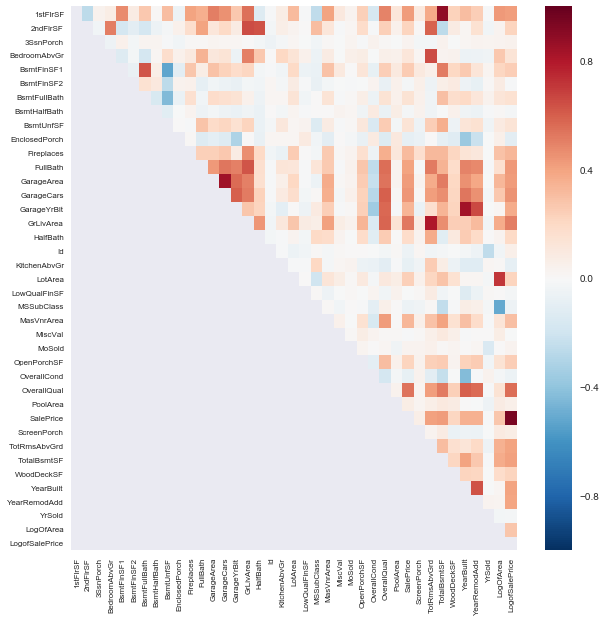

In [45]:
fig,ax = plt.subplots(figsize=(10,10))

mask = np.zeros_like(c, dtype=np.bool)

mask[np.tril_indices_from(mask)] = True

ax = sns.heatmap(c, mask = mask)
ax.set_xticklabels (ax.xaxis.get_ticklabels(), fontsize=8, rotation=90)
ax.set_yticklabels (ax.yaxis.get_ticklabels(), fontsize=8)

plt.show()

---

## 6.

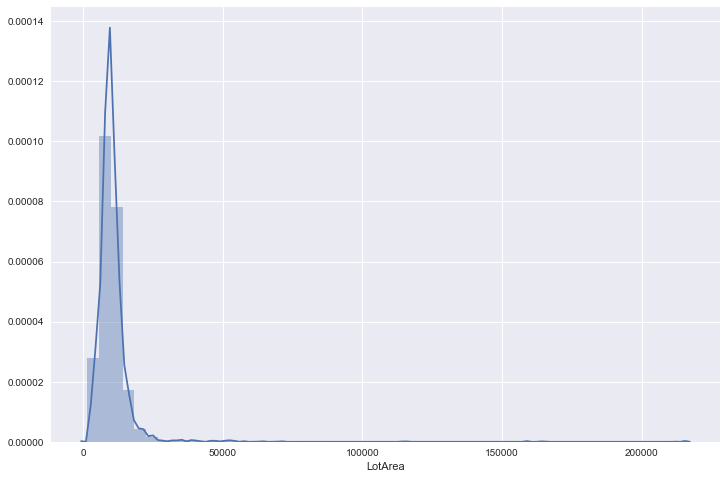

In [29]:
sns.distplot(data.LotArea)

In [30]:
data['LogOfArea'] =np.log(data.LotArea)

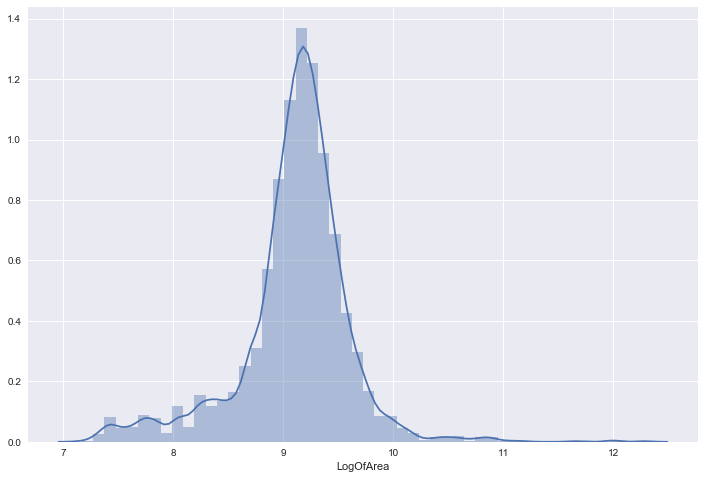

In [31]:
sns.distplot(data.LogOfArea)

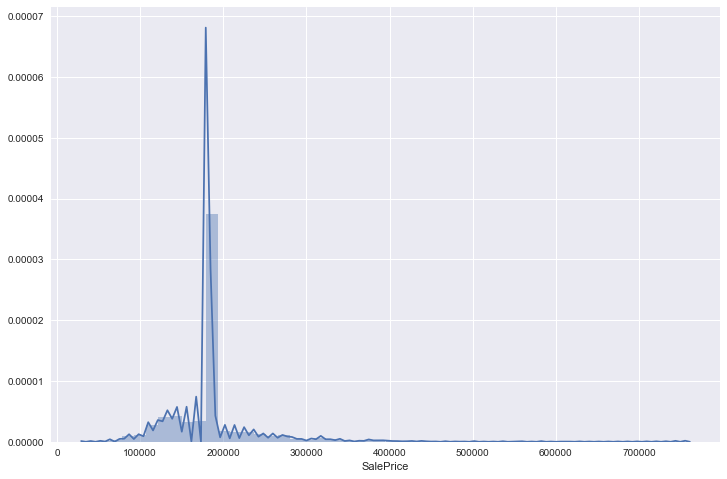

In [32]:
sns.distplot(data.SalePrice)

In [33]:
data['LogofSalePrice'] = np.log(data.SalePrice)

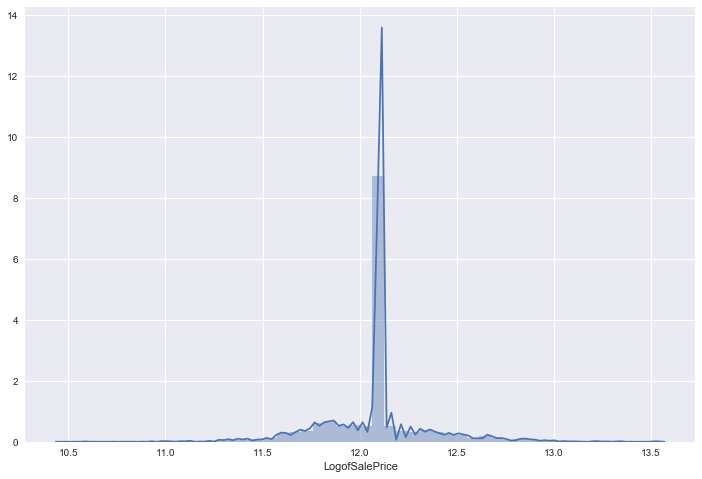

In [34]:
sns.distplot(data.LogofSalePrice)

---

## 7. Pair Plot

In [49]:
columns_pairplot = data[['LotArea', 'SalePrice','PoolArea']]

In [50]:
columns_pairplot.head()

,LotArea,SalePrice,PoolArea
0,11622,180921.19589,0
1,14267,180921.19589,0
2,13830,180921.19589,0
3,9978,180921.19589,0
4,5005,180921.19589,0


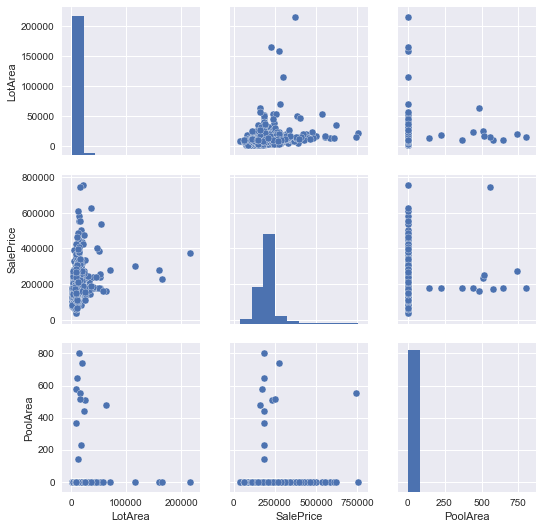

In [53]:
sns.pairplot(columns_pairplot);